## https://scikit-learn.org/stable/user_guide.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:/Datasets/Advertising.csv")

# df = pd.read_csv("https://raw.githubusercontent.com/erkansirin78/datasets/master/Advertising.csv")

# Veri Keşfi

In [3]:
df.head()

,ID,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df['Advertising_Budget'] = df['TV'] + df['Newspaper'] + df['Radio']
df.head()

,ID,TV,Radio,Newspaper,Sales,Advertising_Budget
0,1,230.1,37.8,69.2,22.1,337.1
1,2,44.5,39.3,45.1,10.4,128.9
2,3,17.2,45.9,69.3,9.3,132.4
3,4,151.5,41.3,58.5,18.5,251.3
4,5,180.8,10.8,58.4,12.9,250.0


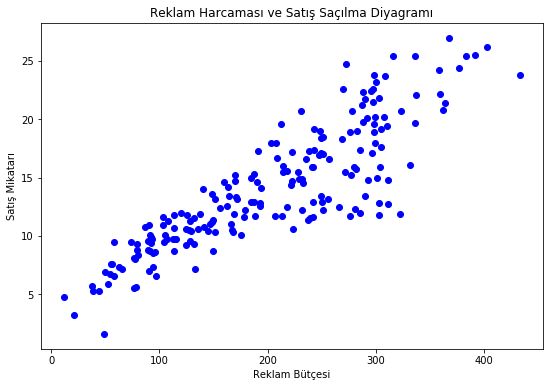

In [5]:
plt.figure(figsize=(9,6))

plt.scatter(df['Advertising_Budget'], df['Sales'], color='blue')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")

plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
ID                    200 non-null int64
TV                    200 non-null float64
Radio                 200 non-null float64
Newspaper             200 non-null float64
Sales                 200 non-null float64
Advertising_Budget    200 non-null float64
dtypes: float64(5), int64(1)
memory usage: 9.5 KB


In [7]:
df.describe()

,ID,TV,Radio,Newspaper,Sales,Advertising_Budget
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500,200.860500
std,57.879185,85.854236,14.846809,21.778621,5.217457,92.985181
min,1.000000,0.700000,0.000000,0.300000,1.600000,11.700000
25%,50.750000,74.375000,9.975000,12.750000,10.375000,123.550000
50%,100.500000,149.750000,22.900000,25.750000,12.900000,207.350000
75%,150.250000,218.825000,36.525000,45.100000,17.400000,281.125000
max,200.000000,296.400000,49.600000,114.000000,27.000000,433.600000


# Veri setini X ve y olarak ayırma (Dikey bölme)

In [8]:
# X (büyük X) girdileri temsil eder, input, bağımsız değişkenler, girdi nitelikler, 
# feature matrix diye de adlandırılır çünkü o bir matris
X = df['Advertising_Budget'].values.reshape(-1,1)
X.shape

(200, 1)

In [9]:
# y (küçük y) output, bağımlı değişken, hedef değişken diye adlandırılır
y = df['Sales'].values
y.shape

(200,)

# Veri setini train-test olarak ayırma (yatay bölme)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
            test_size=0.25, random_state = 142)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 1)
(150,)
(50, 1)
(50,)


# Lineer Regresyon Nesnesi Oluşturma (Boş model yaratma)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
regressor = LinearRegression()

# Lineer modeli eğitme (modeli şekillendirme - veriye uydurma - eğitme)

In [14]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Eğitilmiş modelin neleri var

In [15]:
print("Katsayılar: ",regressor.coef_)
print("Sabit: ",regressor.intercept_)
print("Model parametreleri: ", regressor.get_params())

Katsayılar:  [0.0491106]
Sabit:  4.2861579819989135
Model parametreleri:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [15]:
# y = 4.286157981998912 + 0.0491106X

# Eğitilmiş modelle (makine) test seti kullanarak tahmin

# Muazzam hata burada, bunu sakın yapmayın!!!

In [16]:
###########################################
#                                         #
#   y_pred = regressor.predict(y_test)    #
#                                         #
###########################################

In [16]:
y_pred = regressor.predict(X_test)

In [17]:
y_pred

array([18.32687769,  8.07258502,  9.06461908, 16.49996348, 22.33921347,
        7.51272421,  9.00568636, 17.83577172, 16.62765103, 11.57908165,
       18.60680809, 16.53434089, 12.3402959 , 15.68472756, 10.61651395,
        8.17080621, 12.67424796, 15.22799901,  8.71593384, 18.02239199,
       13.78905852, 20.7873186 , 15.97448009, 16.23476625, 16.01867962,
       18.42018782, 16.1561893 , 11.02904296,  6.94795234, 22.79103096,
       19.5202652 ,  8.05785184, 15.23782113, 18.18445696, 22.0789273 ,
       20.57123197, 18.14025742, 18.32687769, 16.62765103, 20.1537919 ,
       19.26980115, 18.67065187, 12.30100743,  8.0627629 , 13.47966176,
       19.59393109, 10.93082177, 14.24578707, 15.15433312,  6.69257724])

## Tahmin sonuçlarını numpy.ndarray'den dataframe yapma (İncelemek daha Kolay)

In [18]:
predictions = pd.DataFrame(data=y_pred,    # values
                index=range(len(y_pred)),    # 1st column as index
                   columns=['y_pred'])  # 1st row as the column names

# Sadece y_pred'den oluşan df'e test(gerçek) y_test'i sütun olarak ekleme
predictions['y_test'] = y_test
predictions.head(20)

,y_pred,y_test
0,18.326878,12.0
1,8.072585,8.0
2,9.064619,6.6
3,16.499963,19.0
4,22.339213,27.0
5,7.512724,7.2
6,9.005686,8.6
7,17.835772,18.9
8,16.627651,18.5
9,11.579082,11.2


# Regression metrics

## explained_variance

In [20]:
# The sklearn.metrics module implements several loss, score, and utility functions to measure 
# regression performance. Some of those have been enhanced to handle the multioutput case: 
# mean_squared_error, mean_absolute_error, explained_variance_score and r2_score.

In [19]:
from sklearn.metrics import explained_variance_score

In [20]:
explained_variance_score(y_true=y_test, y_pred=y_pred)

0.7750733285694065

## mean_absolute_error

In [21]:
from sklearn.metrics import mean_absolute_error

In [22]:
mean_absolute_error(y_true=y_test, y_pred=y_pred)

1.8551457253166461

## r2_score 

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y_test, y_pred)

0.7646579535020793

# ============    Elle yapılan hesaplamalar  opsiyonel   ==============

# ============================================================

# Tahmin ile gerçek değer arası hatalar

In [37]:
# Tahmin değerleri ile gerçek değerler arasındaki mesafesinin mutlak değeri
predictions['pred_error'] = abs(predictions.y_test - predictions.y_pred)
predictions.head()

,y_pred,y_test,mean_error,pred_error
0,18.326878,12.0,2.426,6.326878
1,8.072585,8.0,6.426,0.072585
2,9.064619,6.6,7.826,2.464619
3,16.499963,19.0,4.574,2.500037
4,22.339213,27.0,12.574,4.660787


# Tahmin ile Ortalama arası hatalar

In [39]:
# Gerçek değerler ile ortalama arasındaki mesafesinin mutlak değeri
import math
predictions['mean_error'] = abs(predictions['y_test'] - predictions['y_test'].mean())
predictions.head()

,y_pred,y_test,mean_error,pred_error
0,18.326878,12.0,2.426,6.326878
1,8.072585,8.0,6.426,0.072585
2,9.064619,6.6,7.826,2.464619
3,16.499963,19.0,4.574,2.500037
4,22.339213,27.0,12.574,4.660787


## Hataların Karesini Almak

In [41]:
predictions["pred_error_square"] = predictions['pred_error'] ** 2
predictions["mean_error_square"] = predictions['mean_error'] ** 2
predictions.head()

,y_pred,y_test,mean_error,pred_error,pred_error_square,mean_error_square
0,18.326878,12.0,2.426,6.326878,40.029381,5.885476
1,8.072585,8.0,6.426,0.072585,0.005269,41.293476
2,9.064619,6.6,7.826,2.464619,6.074347,61.246276
3,16.499963,19.0,4.574,2.500037,6.250183,20.921476
4,22.339213,27.0,12.574,4.660787,21.722931,158.105476


# rmse elle hesaplama

In [43]:
from math import sqrt
rmse = sqrt(sum(predictions['pred_error_square']) / len(predictions['pred_error_square']))
rmse

2.4344901059954016

## r2_score el ile hesaplama

In [44]:
variace_mean_error = sum(predictions['mean_error_square']) / len(predictions['mean_error_square'])
variance_pred_error = sum(predictions['pred_error_square']) / len(predictions['pred_error_square'])

r_2 = 1- (variance_pred_error/variace_mean_error)
r_2

0.7646579535020792

# explained variance

In [45]:
import statistics
# explained_variance(y, y^) = 1 - (Var(y-y^) / Var(y))
variance_y_test = statistics.variance(predictions['y_test'])
variance_y_y_pred = statistics.variance((predictions['y_test'] / predictions['y_pred']))
expln_var = 1 - (variance_pred_error/ variance_y_test)
expln_var

0.7693647944320376

# ========= Grafik ===========

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
y_train_pred = regressor.predict(X_train)

## Eğitim Verileri ile

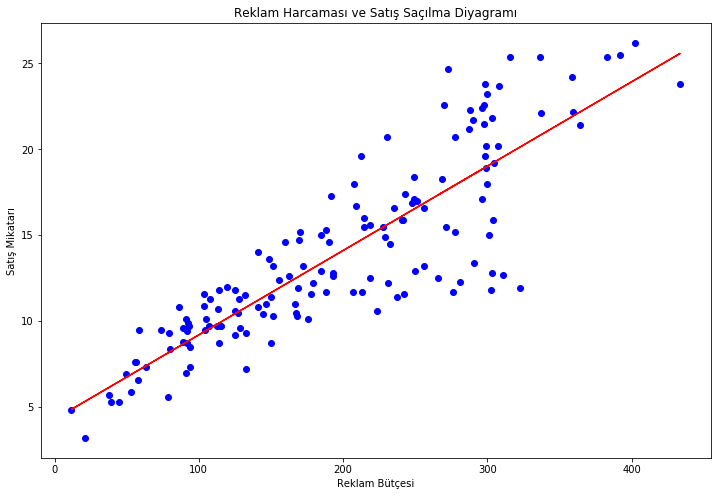

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Mikatarı")
plt.show()

## test Verileri ile

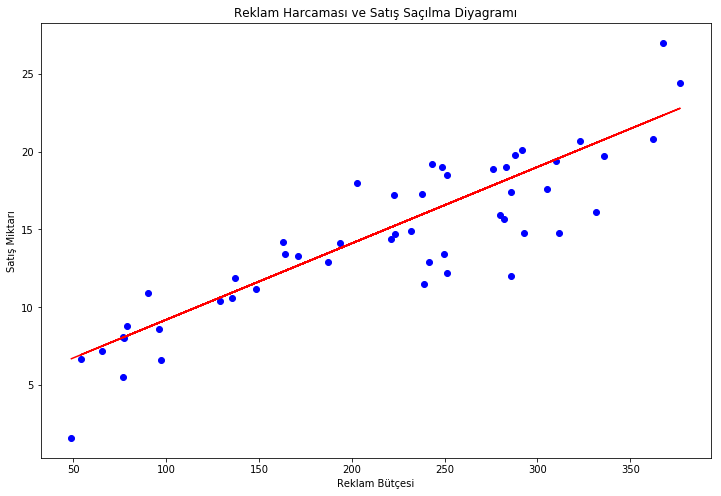

In [29]:
plt.figure(figsize=(12,8))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title("Reklam Harcaması ve Satış Saçılma Diyagramı")
plt.xlabel("Reklam Bütçesi")
plt.ylabel("Satış Miktarı")
plt.show()

# Ödev-21 

In [ ]:
# Kidem_ve_Maas_VeriSeti.csv veri setini kullanarak. Yeni işe alınacak bir çalışanın kıdemine uygun 
# maaşı tahmin eden doğrusal regresyon modeli oluşturunuz.